In [39]:
import random
import pandas as pd

values = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]
winCt = 0
rolledOver = 0
lowerScore = 0
numTests = 1000
rolledOnceDf = pd.DataFrame(columns=["Initial Roll", "Won", "Rolled Over", "Scored Low"])
rolledTwiceDf = pd.DataFrame(columns=["Initial Roll", "Won", "Rolled Over", "Scored Low"])


# returns a boolean indicating if they player won
def simulateOthers(totalScore):
    for j in range(2):
        roll1 = values[random.randint(0, len(values) - 1)]
        if(roll1 > totalScore):
            return False
        roll2 = values[random.randint(0, len(values) - 1)]
        if(roll1 + roll2 > totalScore and roll1 + roll2 <= 1):
            return False
    return True
    
for num in values:
    print()
    print("Initial Roll:", num)

    print("After First Roll:")
    for i in range(numTests):
        # simmulate whether they win or lose with only one roll
        if(simulateOthers(num)):
            winCt += 1
        else:
            lowerScore += 1

    # update dataframe
    rolledOnceDf.loc[len(rolledOnceDf)] = [num, winCt, rolledOver, lowerScore] # Adds a row at the end

    # print("Lost:", loseCt)
    print("Won:", winCt)
    print("Rolled Over:", rolledOver)
    print("Others Scored Higher:", lowerScore)
    # print("Total Lost:", rolledOver + lowerScore)
    lowerScore = rolledOver = winCt = 0


    print("After second roll")
    for i in range(numTests):
        index = random.randint(0, len(values) - 1)
        totalScore = num + values[index]
        if(totalScore > 1):
            rolledOver += 1
        else:
            if(simulateOthers(totalScore)):
                winCt += 1
            else:
                lowerScore += 1
    
    # update dataframe
    rolledTwiceDf.loc[len(rolledTwiceDf)] = [num, winCt, rolledOver, lowerScore] # Adds a row at the end

    print("Won:", winCt)
    print("Rolled Over:", rolledOver)
    print("Others Scored Higher:", lowerScore)
    # print("Total Lost:", rolledOver + lowerScore)
    # print("Win Percentage:", winCt / 1000, "%")

    lowerScore = rolledOver = winCt = 0
        


Initial Roll: 0.05
After First Roll:
Won: 0
Rolled Over: 0
Others Scored Higher: 1000
After second roll
Won: 240
Rolled Over: 51
Others Scored Higher: 709

Initial Roll: 0.1
After First Roll:
Won: 1
Rolled Over: 0
Others Scored Higher: 999
After second roll
Won: 238
Rolled Over: 95
Others Scored Higher: 667

Initial Roll: 0.15
After First Roll:
Won: 1
Rolled Over: 0
Others Scored Higher: 999
After second roll
Won: 232
Rolled Over: 158
Others Scored Higher: 610

Initial Roll: 0.2
After First Roll:
Won: 2
Rolled Over: 0
Others Scored Higher: 998
After second roll
Won: 217
Rolled Over: 191
Others Scored Higher: 592

Initial Roll: 0.25
After First Roll:
Won: 4
Rolled Over: 0
Others Scored Higher: 996
After second roll
Won: 197
Rolled Over: 270
Others Scored Higher: 533

Initial Roll: 0.3
After First Roll:
Won: 14
Rolled Over: 0
Others Scored Higher: 986
After second roll
Won: 224
Rolled Over: 321
Others Scored Higher: 455

Initial Roll: 0.35
After First Roll:
Won: 18
Rolled Over: 0
Others

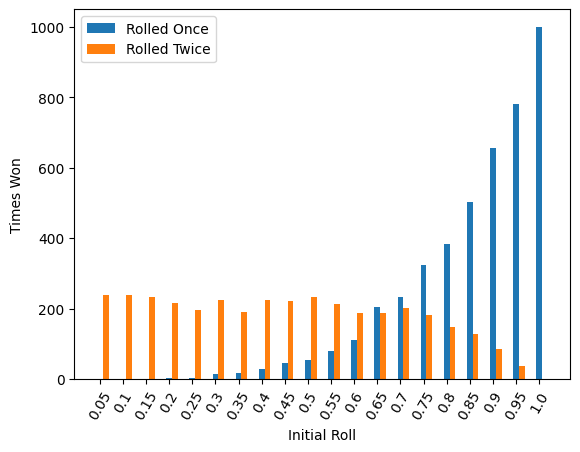

In [40]:
import matplotlib.pyplot as plt
import numpy as np
barWidth = 0.25

r1 = np.arange(len(rolledOnceDf['Initial Roll']))
r2 = [x + barWidth for x in r1]

plt.bar(r1, rolledOnceDf["Won"], width=0.25, label="Rolled Once", align="edge")
plt.bar(r2, rolledTwiceDf["Won"], width=0.25, label="Rolled Twice", align="edge")
plt.xlabel("Initial Roll")
plt.ylabel("Times Won")

plt.xticks([r + barWidth / 2 for r in r1], rolledOnceDf["Initial Roll"], rotation=60)
plt.legend()
# rolledOnceDf.plot(x='Initial Roll', y='Won', kind='bar')
plt.show()